## Consigne

Le travail attendu pour ces 3 semaines est à faire dans les fichiers `session1.py`, `session2.py`, `session3.py`. 

Les fichiers `session{1|2|3}.py` commenceront par un commentaire avec les noms de leur auteur :

```python
# prenom1 nom1
# prenom2 nom2
```

Une attention particulière sera portée à la qualité de la documentation de votre code.

Cette semaine, il s'agit de travaillr dans session3.py

# Session 3 -Modélisation spatialisé de cultures diversifiées

In [1]:
import matplotlib.pyplot as plt
import session3 as project
%matplotlib inline

On suppose maintenant qu'on cherche à planter des plantes aléatoirement dans un champ. 

# 1 Modélisation statique

Dans un premier temps, on modélise des plantes d'espèces différentes comme des des disques ayant des rayons différents. On place ces disques aléatoirement avec une loi uniforme sur la position de sorte qu'elles ne s'intersectent pas.

#### 1.1 Implémenter une fonction qui renvoie une liste de N plantes plantées aléatoirement avec une loi uniforme sur un carré de longueur L. Les plantes sont représentées par des disques de rayons aléatoire entre $r_{min}$ et $r_{max}$.

In [2]:
N = 150
L = 10
rmin = .05
rmax = .8
plants = project.multi_intercrop(N, L, rmin, rmax)
print(plants[0])

{'pos': [1.8561927523766706, 7.0675802452493555], 'r': 0.7989894478894881}


#### 1.2 Implémenter une fonction qui produit une représentation graphique du champs.

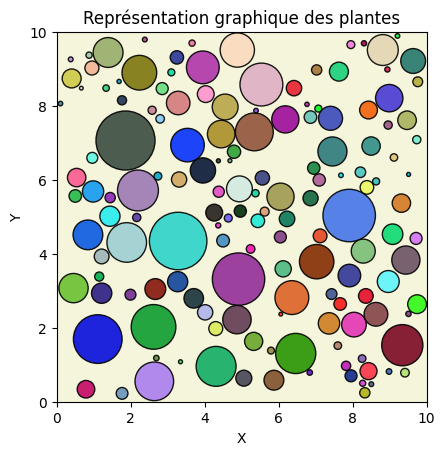

In [3]:
project.fig_field(plants,L)

#### 1.3 Imaginer un algorithme plus rapide que l'algorithme naïf dans le cas ou on a un seul rayon(On pourra utiliser un KD tree pour chercher les Ns plus proches voisins). Comparer les vitesses d'execution des deux fonctions.

done naif
Algo naïf: 0.17476725578308105, Algo KD tree: 0.10604190826416016


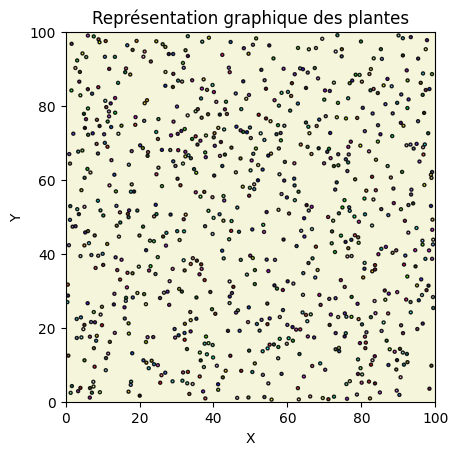

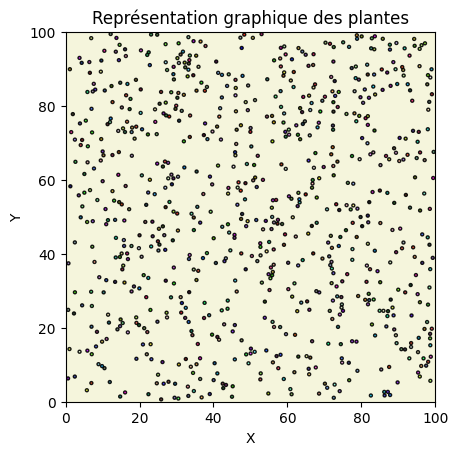

In [4]:
L=100
N=800
r=.4

t, plants = project.monocrop(N,L,r)
print("done naif")
t_KD, plants_KD = project.monocrop_KD(N,L,r)
print("Algo naïf: %s, Algo KD tree: %s"%(t,t_KD))

project.fig_field(plants,L)

project.fig_field(plants_KD, L)

#### 1.4 Quand on considère une espèce unique (toutes les plantes ont le même rayon), quelle est la densité maximale possible de plantes en considérant une seule espèce sur un réseau triangulaire

##   Un réseau triangulaire sur un carré de côté L est constitué de triangles équilatéraux. Chaque triangle a un cercle inscrit de rayon r, ce qui signifie que le côté du triangle est a=2r. L'aire d'un triangle équilatéral de côté a est donnée par : (a ** 2) * sqrt(3)/4 . En fonction du rayon r du cercle inscrit, cette aire devient 4 * (r ** 2) * sqrt(3)/4 = (r ** 3) * sqrt(3)
##    Pour calculer la densité maximale de disques (cercles) pouvant être placés dans un réseau triangulaire sur un carré de côté L, il faut d'abord déterminer combien de cercles peuvent être insérés dans la surface totale L2. Le nombre de cercles est donc donné par :nb = AireCarré/AireTriangle = (L ** 2)/((r ** 3) * sqrt(3))
##    La densité représente la proportion de l’aire occupée par les cercles par rapport à l’aire totale du carré.
##    = AireCercles/AireCarré = pi * (r ** 2) * nb / L**2  ~ 0.907 

#### 1.5 Estimer la densité moyenne maximale qu'on peut atteindre avec un plantation aléatoire et comparer la à la densité maximale (avec une espèce)

In [5]:
import numpy as np 
L=100
r= 0.4
nb_simulations = 32
densite_moyenne, ecart_type_densite, densites = project.simuler_plantation_aleatoire(L, r, nb_simulations)

print(f"Densité moyenne estimée : {densite_moyenne:.4f}")
print(f"Écart-type de la densité : {ecart_type_densite:.4f}")
print(f"Intervalle de confiance à 95% : [{densite_moyenne - 1.96 * ecart_type_densite / np.sqrt(nb_simulations):.4f}, {densite_moyenne + 1.96 * ecart_type_densite / np.sqrt(nb_simulations):.4f}]")

KeyboardInterrupt: 

## La fonction peut prendre du temps, donc les résultats obtenus pour un appel de fonction sont les suivants :

## Densité moyenne estimée : 0.2462
## Écart-type de la densité : 0.0015
## Intervalle de confiance à 95% : [0.2457, 0.2468]

## La différence entre la densité moyenne estimée (0.2462) et la densité maximale théorique (0.907) est due à l'arrangement suboptimal des disques dans la simulation aléatoire. En effet, dans un cas d'arrangement aléatoire, les disques ne sont pas organisés de manière optimale pour occuper tout l'espace disponible, contrairement à un réseau triangulaire parfait.

# 2 Modélisation dynamique

On considère maintenant la dynamique de croissance des plantes, on suppose que les plantes sont plantées à des temps aléatoires suivant une loi de Poisson. Le rayon de la plante croit suivant $r(t)  = \alpha t$ jusqu'à ce que les plantes soient enlevées du champs après un temps $t_h$. On vérifiera avant de planter chaque plante que celle-ci n'entrera pas en collision avec ses voisines au cours de leur croissance.

#### 2.1 Simuler la dynamique du champs. La fonction renverra une liste de dictionnaires (un par plante) contenant la position et le temps de plantation de celle-ci. Implémenter un fonction qui permet de visualiser l'état du champs au temps t (un snapshot et une animation).

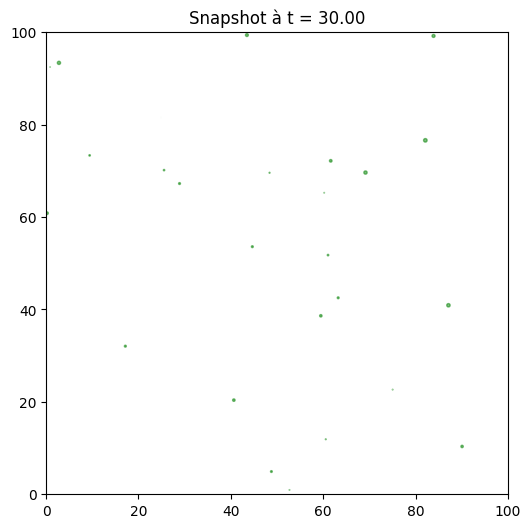

<Figure size 640x480 with 0 Axes>

[1.0588793352882113, 2.341900201026876, 3.342068057626935, 3.90920416021456, 5.385140448808282, 6.402001230040792, 8.609486080978446, 8.97079424317494, 9.813092557791986, 10.374376575042968, 10.604812943698535, 14.138165314835785, 14.52009954530226, 14.611575929802811, 14.709797748291486, 15.373512571032265, 17.823780454703595, 18.214633691341717, 18.807731024368742, 22.632807705988917, 23.543296449479648, 25.19174917829656, 25.278976820940137, 25.602377676196525, 26.4497629168067, 29.970214304313092, 31.444478497371964]


In [6]:
planting_rate=1
Rmax=.4
th=30
plants, ps = project.dynamic_random_planting(planting_rate, Rmax, th)
project.fig_dynamic(plants, "random_planting.png", "random_planting.mp4")
print(ps)

In [7]:
from IPython.display import Video

Video("random_planting.mp4")

#### 2.2 Trouver une façon plus rapide de faire les simulations (Bonus)